## 장르 탐색
### 수행단계
- 장르 탐색
    - 영화의 장르별 분포 (Bar chart) 및 장르별 평균 평점을 확인하라.

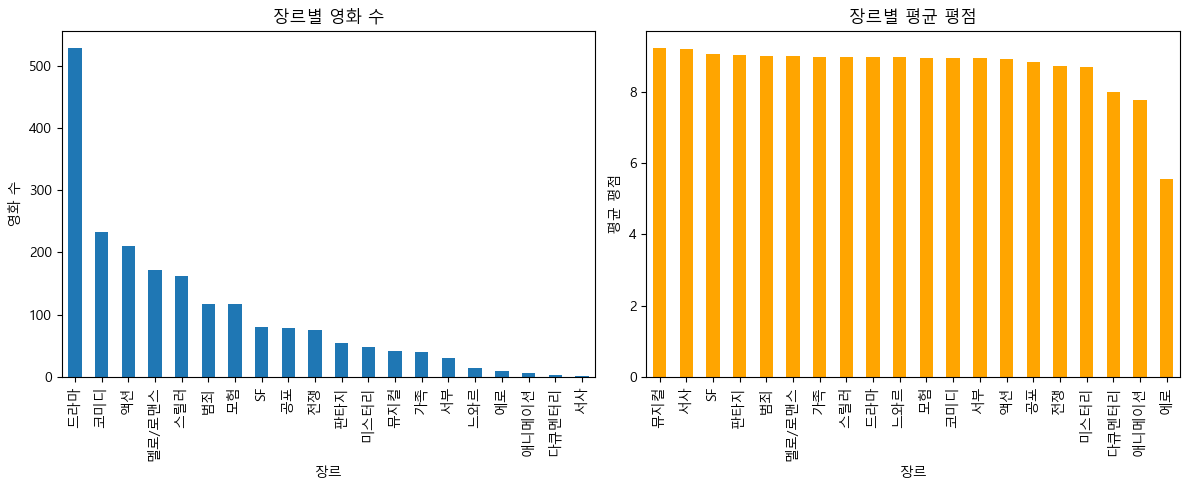

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc

# 한글 폰트 설정 (Windows의 '맑은 고딕' 예제)
rc('font', family='Malgun Gothic')

# 한글 깨짐 방지를 위한 유니코드 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호가 깨지는 현상 방지

# 데이터 로드
movies = pd.read_csv('kmrd-small/movies.txt', sep="\t", engine='python')
users = pd.read_csv('kmrd-small/rates.csv')
genres = pd.read_csv('kmrd-small/genres.csv')

# 장르별 영화 수 계산
genre_counts = genres['genre'].value_counts()  # 값의 빈도수로 자동 정렬

# 장르별 평균 평점 계산
merged_data = pd.merge(genres, users, on='movie')
genre_avg_rate = merged_data.groupby('genre')['rate'].mean()  # 인덱스(기본적으로 알파벳 순)로 자동 정렬

# 시각화
plt.figure(figsize=(12, 5))

# Bar chart(막대그래프): 장르별 영화 수
plt.subplot(1, 2, 1) # plt.subplot(nrows, ncols, index)
genre_counts.plot(kind='bar')  # 값의 빈도수로 자동 정렬
plt.title('장르별 영화 수')
plt.ylabel('영화 수')
plt.xlabel('장르')

# Bar chart(막대그래프): 장르별 평균 평점
plt.subplot(1, 2, 2)
genre_avg_rate.sort_values(ascending=False).plot(kind='bar', color='orange')  
# 값에 따라 오름차순 정렬 (sort_values() 없으면 알파벳 순)
# .sort_values(ascending=False) 에서 ascending=False 있으면 내림차순(현재), 없으면 오름차순 

plt.title('장르별 평균 평점')
plt.ylabel('평균 평점')
plt.xlabel('장르')

plt.tight_layout()
plt.show()

# ---------------------------------
# value_counts()는 결과를 값의 빈도수로 자동 정렬
# groupby()는 결과를 인덱스(기본적으로 알파벳 순)로 자동 정렬
# ---------------------------------
# 그래프(graph): 데이터를 시각적으로 표현하는 일반적인 용어.
# 플롯(plot): 그래프의 구체적인 구현이나 특정 유형을 지칭할 때 주로 사용.
# ---------------------------------
# subplot 대신에 각각 독립적적인 그래프를 그리고 싶다면?
# plt.figure(figsize=(10, 5)) # plt.figure(figsize=(가로, 세로)), 값은 인치치
# genre_counts.plot(kind='bar')
# plt.title('장르별 영화 수')
# plt.ylabel('영화 수')
# plt.xlabel('장르')
# plt.show()

# plt.figure(figsize=(10, 5))
# genre_avg_rate.sort_values(ascending=False).plot(kind='bar', color='orange')
# plt.title('장르별 평균 평점')
# plt.ylabel('평균 평점')
# plt.xlabel('장르')
# plt.show()
